# ARMA model fitting and statistics evaluations

Read datasets already computed


In [1]:
# read csv datasets in folder and save them in dataframes

import pandas as pd
import matplotlib.pyplot as plt

names = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "target"]
dataset_no_drift = pd.read_csv("dataset_no_drift.csv", names=names)
dataset_drift_labels = pd.read_csv("dataset_drift_labels.csv", names=names)
dataset_drift_features = pd.read_csv("dataset_drift_features.csv", names=names)

# print dataset_no_drift shape
print(dataset_no_drift.shape)
dataset_size = dataset_no_drift.shape


(20000, 7)


In [6]:
# compute list of features indexes and the binary label
features = dataset_no_drift.columns[:-1]
target = dataset_no_drift.columns[-1]
print(list(features), target)


['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'] target


Plot ACF and PACF plots: auto-correlation and partial auto-correlation plots. These plots are evaluated on the first 200 time series steps for ease of showing the results graphically. The plots refer to the dataset with no concept drift. The lags are set to 20.

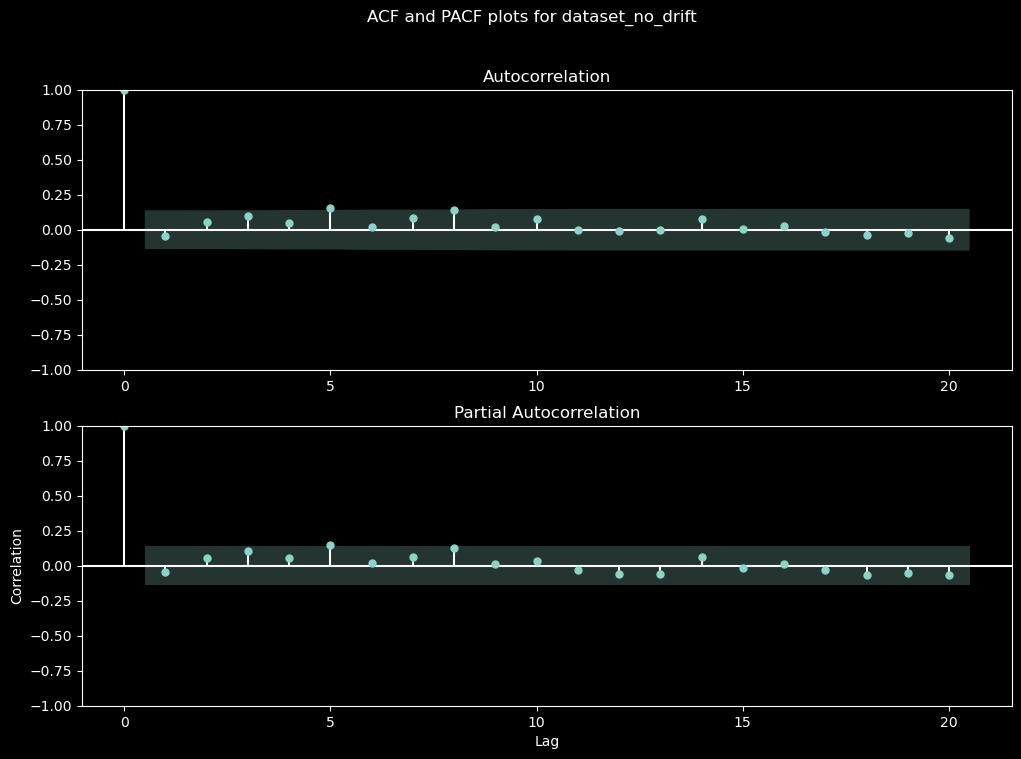

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Visualizations lag values
lag_acf = 20
lag_pacf = 20

# Plotting the ACF and PACF plots in a single figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset_no_drift.iloc[0:200, 0], lags=lag_acf, ax=axes[0])
plot_pacf(dataset_no_drift.iloc[0:200, 0], lags=lag_pacf, ax=axes[1], method='ols')
plt.suptitle("ACF and PACF plots for dataset_no_drift")
plt.xlabel("Lag")
plt.ylabel("Correlation")

plt.show()



The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are used to identify the order of the AR (autoregressive) and MA (moving average) terms in an ARMA (autoregressive moving average) process.

However, if the ARMA process is non-linear, the ACF and PACF plots may not be sufficient to identify the order of the AR and MA terms. This is because non-linear ARMA processes can exhibit complex dependencies that are not captured by the ACF and PACF plots.

In such cases, it **may be necessary to use other techniques**, such as model selection criteria (such as the Akaike Information Criterion or Bayesian Information Criterion) or machine learning methods to identify the order of the AR and MA terms in the non-linear ARMA process.

Therefore, the results of ACF and PACF plots on a non-linear ARMA process may **not be conclusive** in determining the appropriate AR and MA terms to use in modeling the process.

### Fit ARMA model to the time series, with high order parameters

Fit ARMA(p, q) model to the dataset, with p = 10, q = 10. No seasonality included

In [4]:
from statsmodels.tsa.arima.model import ARIMA

#using the p, q values from the creation of the dataset
model = ARIMA(dataset_no_drift.iloc[0:200, 0], order=(10, 0, 10))
model_fit = model.fit()

# print model summary
print(model_fit.summary())


d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               feature1   No. Observations:                  200
Model:               ARIMA(10, 0, 10)   Log Likelihood                -142.489
Date:                Tue, 25 Apr 2023   AIC                            328.978
Time:                        15:32:09   BIC                            401.541
Sample:                             0   HQIC                           358.344
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0735      0.081     -0.911      0.362      -0.232       0.085
ar.L1          0.2351      1.905      0.123      0.902      -3.499       3.969
ar.L2         -0.0663      1.467     -0.045      0.9

Let's analyze each of the test results individually:

- Ljung-Box (L1) (Q): 0.04, Prob(Q): 0.84:
The Ljung-Box test is a statistical test used to determine whether the residuals of a time series are independently distributed or whether there is some serial correlation present. In this case, the results suggest that there is no evidence of serial correlation in the residuals of your time series.

- Jarque-Bera (JB): 1.23, Prob(JB): 0.54:
The Jarque-Bera test is a statistical test used to determine whether a data sample has skewness and kurtosis that matches a normal distribution. In this case, the test statistic (JB) is 2.04, and the probability value (Prob(JB)) is 0.36. Since the probability value is greater than 0.05 (i.e., the commonly used significance level), we can conclude that the sample is likely drawn from a normal distribution.

- Heteroskedasticity (H): 1.56, Prob(H) (two-sided): 0.07:
The term heteroskedasticity refers to the situation where the variance of the residuals in a regression or time series model is not constant over time. In this case, the test statistic (H) is 1.56, and the probability value (Prob(H)) is 0.07. Since the probability value is greater than 0.05, we can conclude that it might suffer from heteroskedasticity in the time series, although we at 7% confidence level.

Overall, based on the statistical test results you provided, it appears that **the time series does not exhibit serial correlation, is likely normally distributed, and does not suffer from heteroskedasticity.**

### Statistical tests

Plot model diagnostics of the ARMA model


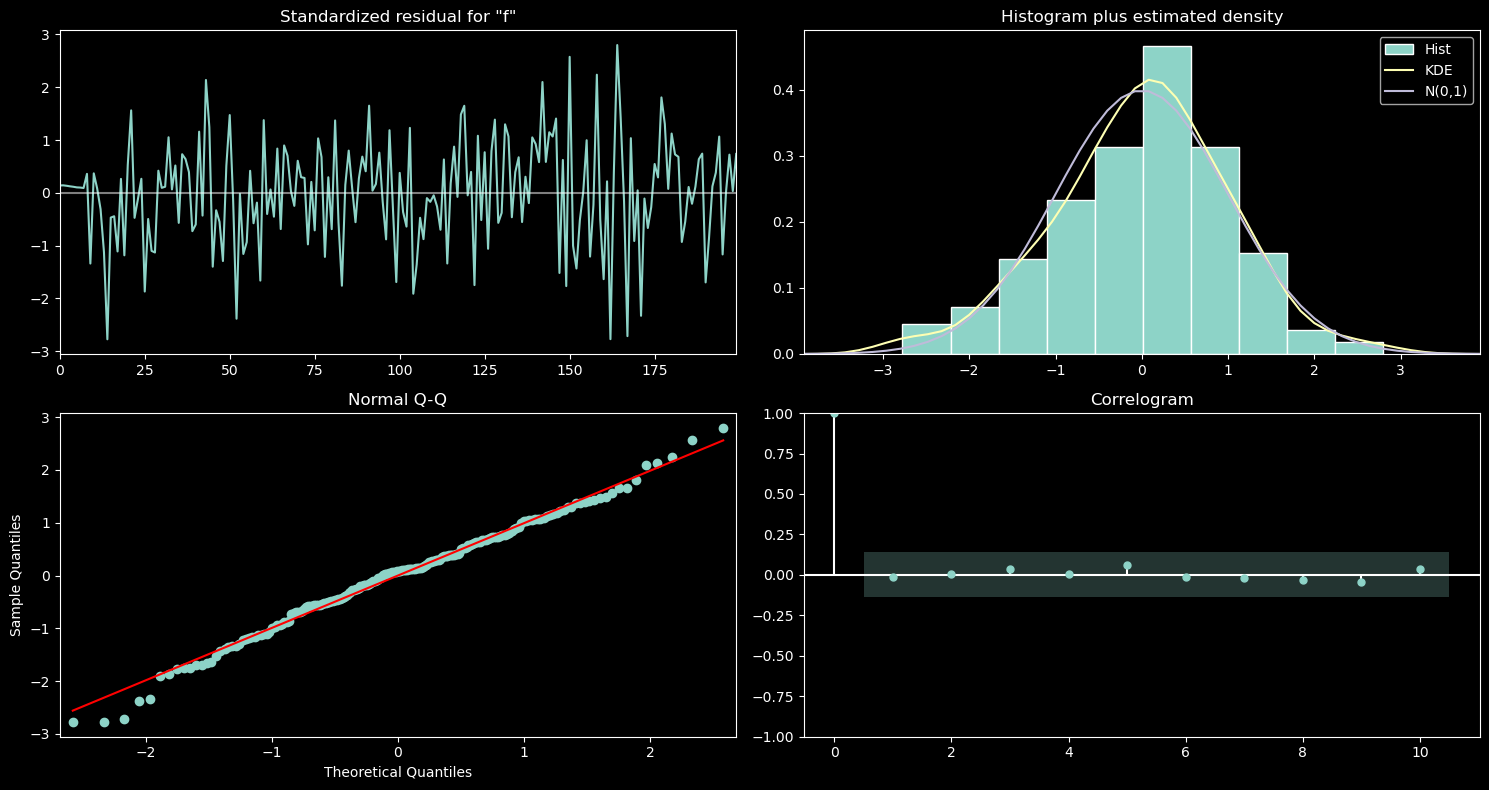

In [5]:
model_fit.plot_diagnostics(figsize=(15,8))
plt.tight_layout()
plt.show()

From these plots it appears that the ARMA(p, q) model fits well the data provided. Although, from the first plot, the one with the standardized residuals, we can determine that the residuals are of the same order of the time series values. This implies that the residuals are not negligible at all, and that the model fitting is not appropriate at all to the time series. The other plots may be deceiving because their results are not significant, since they are not meant to be used with non linear ARMA models

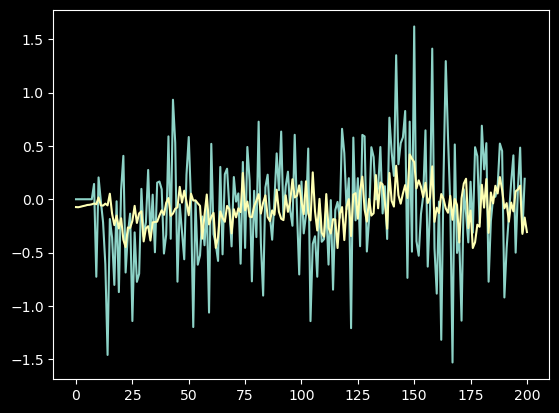

Test RMSE: 0.492


In [6]:
#plot model predictions overlapped with the actual values of the dataset
plt.plot(dataset_no_drift.iloc[0:200, 0])
plt.plot(model_fit.predict(0, 200))
#plot width and height
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

# evaluate model accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate root mean squared error
rmse = sqrt(mean_squared_error(dataset_no_drift.iloc[0:200, 0], model_fit.predict(0, 199)))
print('Test RMSE: %.3f' % rmse)


From the predictions of this model, we can evince that the root mean square error is not low and it is considerable with respect the time series values. So, we can confirm that this model doesn't provide good results at all.

In [7]:
#compute augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset_no_drift.iloc[:, 0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# p-value is less than 0.05, so we can reject the null hypothesis that the data is not stationary
# therefore we conclude that the data is stationary


ADF Statistic: -41.959780
p-value: 0.000000
Lags Used: 7.000000
Number of Observations Used: 19992.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The augmented Dickey Fuller test is a unit root test, to check the stationaruity of the time series. Since the p-value is less than 0.05, so we can reject the null hypothesis that the data is not stationary. Therefore we conclude that the data is stationary.

## Cross correlation between variables and their lagged version

Computation of the heatmap containing the cross-correlation values of the features and their lagged version of themselves

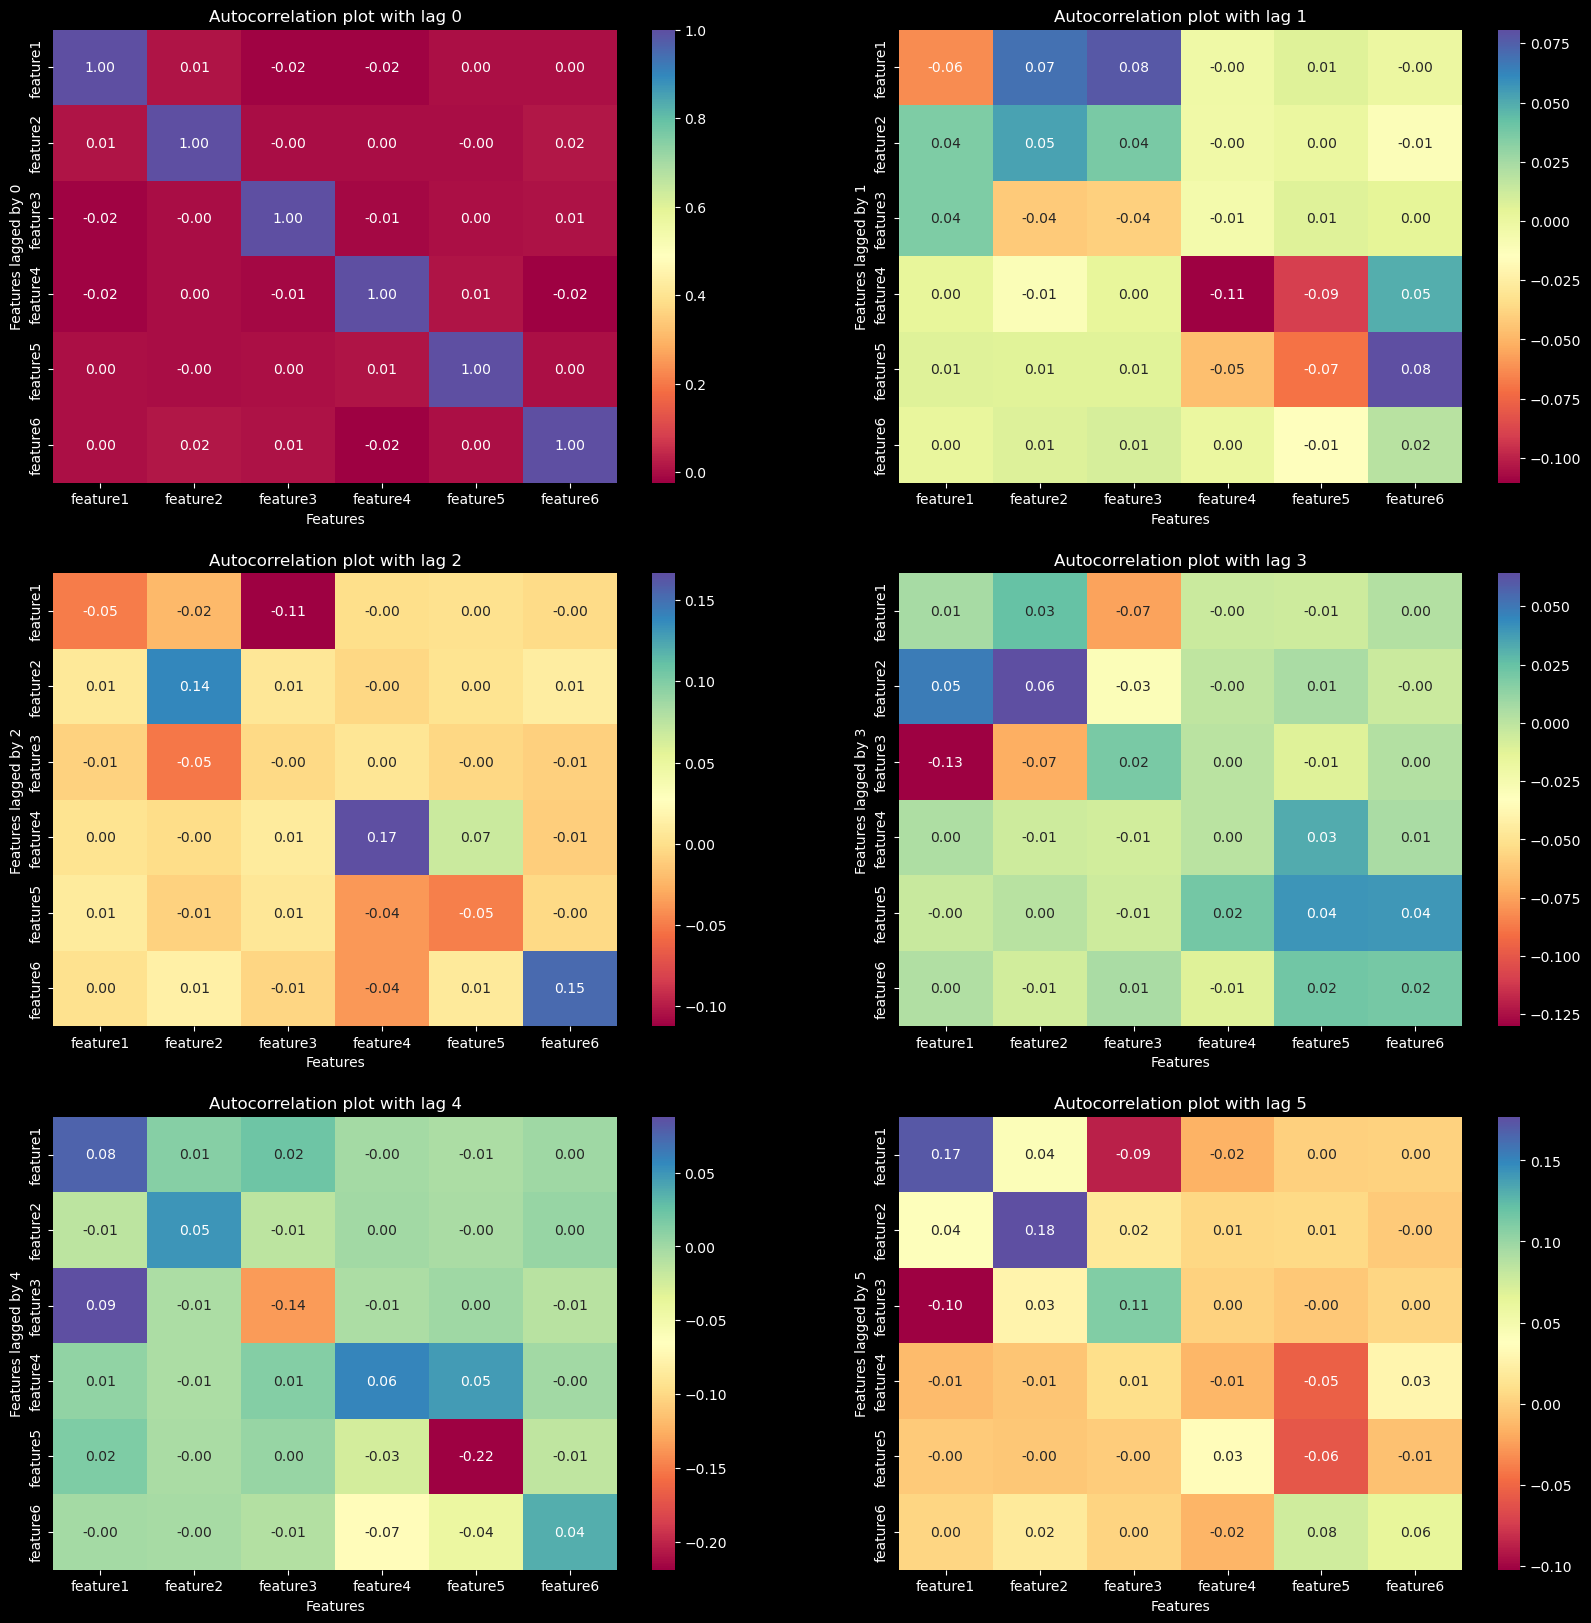

In [9]:
import seaborn as sns
import numpy as np

# create empty array to store the cross-correlation values, for each feature and lag up to lag=6
crosscorr = np.empty((6, 6, 6))

# Compute the cross-correlation for each feature and lag up to 6
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        for k in range(6):
            crosscorr[i, j, k] = dataset_no_drift[feature_x].corr(dataset_no_drift[feature_y].shift(k))

# Plot the cross-correlation matrix as a figure with 3x2 squared subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(crosscorr[:, :, i], annot=True, fmt=".2f", cmap='Spectral', ax=ax)
    ax.set_title("Autocorrelation plot with lag {}".format(i))
    ax.set_xlabel("Features")
    ax.set_ylabel("Features lagged by {}".format(i))
    # add x and y ticks
    ax.set_xticks(np.arange(6)+0.5)
    ax.set_yticks(np.arange(6)+0.5)
    ax.set_xticklabels(features)
    ax.set_yticklabels(features)


plt.show()

In these plots we can evince the results of the cross-correlation between the different features in the dataset. Although the numbers are close to 0, the colored plots help to see that there is some difference between the various variables. The reason for which the cross-correlation values are next to zero, is because the coefficients used for the creation of the dataset are normally distributed around zero with very small standard deviation.

From these plots we can see that they mirror the formulas used for the creation of the features. In fact, in the formulas, the features 1, 2 and 3 are all dependant on each other, and the same goes for 4, 5 and 6. This result is what we expect, also because we can clearly see that couples of variables such as 2 and 4, or 1 and 5 are not cross-correlated, and this result is also expected.

The cross-correlation values vary for each lag value, in fact the first 3 variables maintain high cross-correlation even up to lag 5. 

Now let's compute the cross-correlation between the label $y(t)$ and its past values 

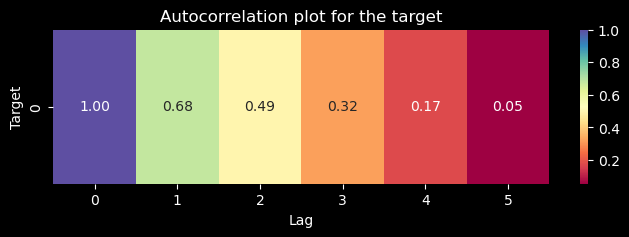

In [10]:
# create empty array to store the cross-correlation values for the target and lag up to lag=6
crosscorr = np.empty(6)
# Compute the cross-correlation for each label and lag up to 6
for i in range(6):
	crosscorr[i] = dataset_no_drift[target].corr(dataset_no_drift[target].shift(i))

# Plot the cross-correlation vector in a heatmap with the lag values on the x-axis
fig, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(crosscorr.reshape(1, 6), annot=True, fmt=".2f", cmap='Spectral', ax=ax)
ax.set_title("Autocorrelation plot for the target")
ax.set_xlabel("Lag")
ax.set_ylabel("Target")
# add x and y ticks
ax.set_xticks(np.arange(6)+0.5)
ax.set_yticks(np.arange(1)+0.5)
ax.set_xticklabels(np.arange(6))

plt.show()



From the result of this plot, we can conclude that the label y is highly correlated with the lagged version of itself, but after 5 time steps, the auto-correlation becomes negligible. This result is expected since the formula for the computation of the binary label depends on the past labels up to 4 time steps in the past

# Streaming Machine Learning models

Import all necessary functions from river library

In [79]:
# streaming dataset
from river.stream import iter_pandas
# metrics for model evaluation
from river.metrics import Accuracy, CohenKappa, F1, Recall, Precision
from river.metrics.base import Metrics
# prequential evaluation
from river.evaluate import iter_progressive_val_score
# classification models and ensembles
from river.tree import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier
# base classifier for comparison
from river import naive_bayes

# import temporally augmented classifier
from temporally_augmented_classifier import TemporallyAugmentedClassifier

# import kappa temporal metric from kappa_t.py file
from kappa_t import CohenKappaTemporal

# rolling metrics
from river.utils import Rolling
from river.stats import Mean

import numpy as np


Functions used to plot the metrics of the models trainings over time

In [94]:
# extract a float number from a string, for example: "asd0.5sad" -> 0.5
def extract_float(string):
	string = str(string)
	number = float(''.join(ele for ele in string if ele.isdigit() or ele == '.' or ele == '-'))
	if (number > 100):
		number = number - 100.0

	return number / 100.0

# plot the results in a single plot, where each column values are plotted as a line
def plot_metrics(results):
	
	fig, ax = plt.subplots(figsize=(12, 8))
	# metrics list used in the evaluation
	labels = ["Accuracy", "CohenKappa", "CohenKappaTemporal", "F1", "Recall", "Precision"]
	for i in range(0, results.shape[1] - 1):
		ax.plot(results[50:, i], label=labels[i])

	ax.set_xlabel("Instances")
	ax.set_ylabel("Metric value")
	ax.set_title("Metrics")
	ax.legend()
	plt.show()



Progressive model evaluation function with all the metrics. It prints the metrics value during the training process, then saves the final metric values for further data visualization

In [89]:
def prequential_evaluation(datastream, model):
    # initialize metrics
	my_metrics = Metrics(metrics = [
		Accuracy(),
		CohenKappa(),
		CohenKappaTemporal(),
		F1(),
		Recall(),
		Precision()
	])
	
	# create array of 6 rolling objects, one for each metric
	rolling_metrics = np.empty(6, dtype = object)
	for i in range(6):
		# add metrics wrapper Rolling from river 
		rolling_metrics[i] = Rolling(Mean(), window_size = 250)
	
	# evaluate model
	metric_results = iter_progressive_val_score(dataset = datastream, model = model, metric = my_metrics)

	# copy metric results as a typing generator into a numpy array
	# create an array of size (len(results), len(columns)) with the float values
	results = np.empty(dataset_size, dtype = float)
	for i, element in enumerate(metric_results):
		values_dict = np.array(list(element.values()))

		# print every 1000th element
		if ((i + 1) % 1000 == 0):
			# print element of the values dict separated by commas
			print(*values_dict, sep = ", ")
		
		# get the float values from the string values in the results array
		results[i, :] = [extract_float(x) for x in values_dict]

		# apply rolling metrics to values_dict
		for j in range(6):
			rolling_metrics[j].update(results[i, j])
			results[i, j] = rolling_metrics[j].get()
	
	return results

# Evaluation on the dataset with no concept drift and base learners

Create a structure holding the final values for every model trained, every metric and eachof the 3 datasets computed. This is used at the end of the notebook to show the final aggregated results

In [95]:
# numpy array with depth 3, 6 columns and 10 rows
# each depth represents a different dataset
# each column represents a different metric
# each row represents a different training instance
scores = np.empty((6, 6, 3), dtype = float)

Comparison with baseline model gaussian naive bayes

Accuracy: 68.47%, CohenKappa: 2.89%, CohenKappaTemporal: -154.03%, F1: 80.94%, Recall: 97.38%, Precision: 69.25%, 1000
Accuracy: 66.88%, CohenKappa: 0.95%, CohenKappaTemporal: -147.94%, F1: 79.98%, Recall: 98.44%, Precision: 67.35%, 2000
Accuracy: 69.42%, CohenKappa: 0.88%, CohenKappaTemporal: -131.57%, F1: 81.85%, Recall: 98.99%, Precision: 69.76%, 3000
Accuracy: 69.24%, CohenKappa: 0.64%, CohenKappaTemporal: -127.78%, F1: 81.75%, Recall: 99.24%, Precision: 69.49%, 4000
Accuracy: 69.81%, CohenKappa: 0.55%, CohenKappaTemporal: -127.95%, F1: 82.16%, Recall: 99.40%, Precision: 70.02%, 5000
Accuracy: 70.93%, CohenKappa: 0.52%, CohenKappaTemporal: -116.38%, F1: 82.94%, Recall: 99.51%, Precision: 71.11%, 6000
Accuracy: 70.94%, CohenKappa: 0.45%, CohenKappaTemporal: -114.33%, F1: 82.96%, Recall: 99.58%, Precision: 71.09%, 7000
Accuracy: 70.91%, CohenKappa: 0.39%, CohenKappaTemporal: -115.06%, F1: 82.94%, Recall: 99.63%, Precision: 71.04%, 8000
Accuracy: 71.12%, CohenKappa: 0.35%, CohenKappaT

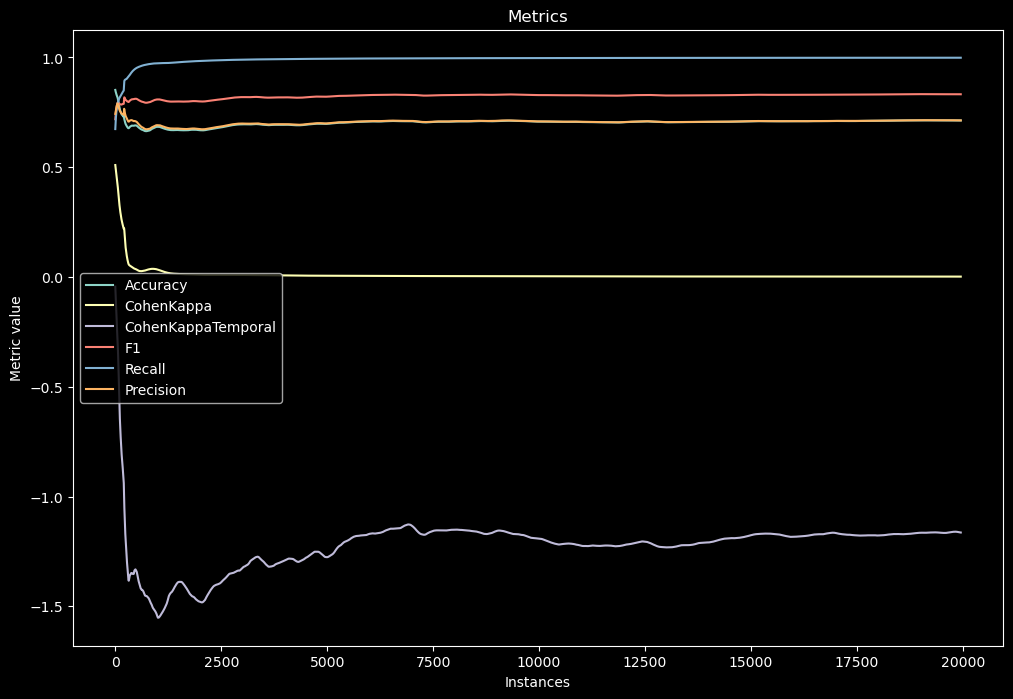

In [96]:
model = naive_bayes.GaussianNB()

datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[0, :, 0] = metric_results[dataset_size[0] - 1, :-1]

Using a hoeffding tree classifier for the dataset

Accuracy: 68.57%, CohenKappa: 1.26%, CohenKappaTemporal: -153.23%, F1: 81.20%, Recall: 98.69%, Precision: 68.97%, 1000
Accuracy: 67.08%, CohenKappa: 0.53%, CohenKappaTemporal: -146.44%, F1: 80.22%, Recall: 99.33%, Precision: 67.27%, 2000
Accuracy: 69.56%, CohenKappa: 0.47%, CohenKappaTemporal: -130.56%, F1: 82.00%, Recall: 99.57%, Precision: 69.69%, 3000
Accuracy: 69.29%, CohenKappa: 0.31%, CohenKappaTemporal: -127.41%, F1: 81.82%, Recall: 99.57%, Precision: 69.44%, 4000
Accuracy: 69.81%, CohenKappa: 0.18%, CohenKappaTemporal: -127.95%, F1: 82.19%, Recall: 99.60%, Precision: 69.96%, 5000
Accuracy: 70.93%, CohenKappa: 0.19%, CohenKappaTemporal: -116.38%, F1: 82.97%, Recall: 99.67%, Precision: 71.06%, 6000
Accuracy: 70.94%, CohenKappa: 0.16%, CohenKappaTemporal: -114.33%, F1: 82.98%, Recall: 99.72%, Precision: 71.05%, 7000
Accuracy: 70.91%, CohenKappa: 0.14%, CohenKappaTemporal: -115.06%, F1: 82.96%, Recall: 99.75%, Precision: 71.00%, 8000
Accuracy: 71.12%, CohenKappa: 0.13%, CohenKappaT

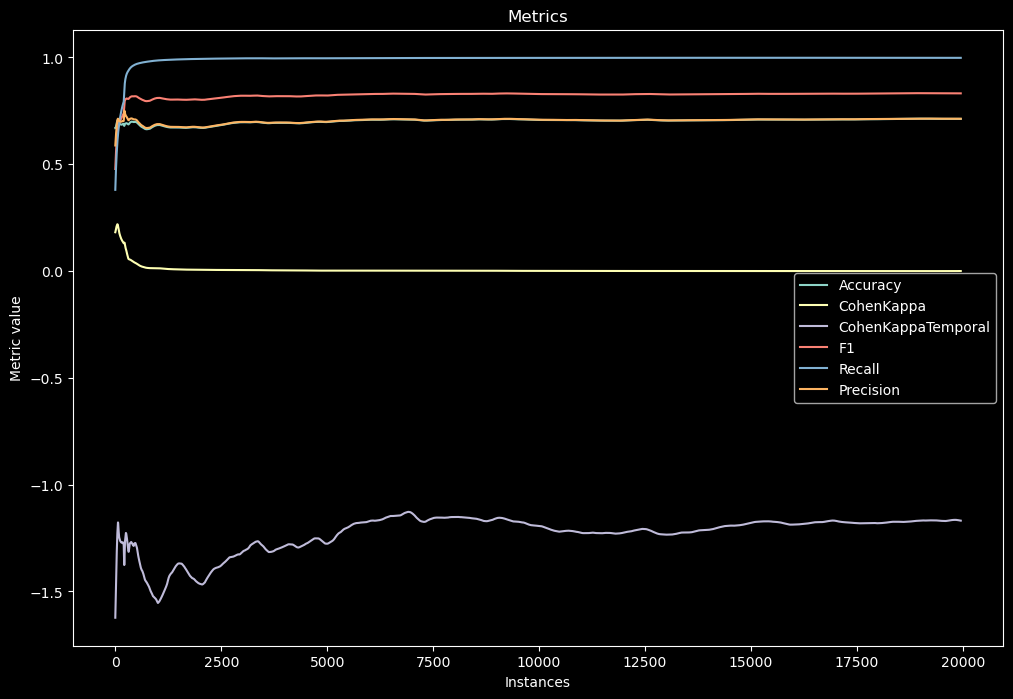

In [97]:
datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])

model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[1, :, 0] = metric_results[dataset_size[0] - 1, :-1]

Use temporal augmentation with the hoeffding tree classifier

Accuracy: 84.18%, CohenKappa: 62.92%, CohenKappaTemporal: -27.42%, F1: 88.57%, Recall: 89.08%, Precision: 88.06%, 1000
Accuracy: 84.94%, CohenKappa: 65.73%, CohenKappaTemporal: -12.73%, F1: 88.83%, Recall: 89.13%, Precision: 88.54%, 2000
Accuracy: 85.66%, CohenKappa: 66.02%, CohenKappaTemporal: -8.59%, F1: 89.72%, Recall: 89.89%, Precision: 89.55%, 3000
Accuracy: 85.65%, CohenKappa: 66.15%, CohenKappaTemporal: -6.30%, F1: 89.67%, Recall: 89.80%, Precision: 89.54%, 4000
Accuracy: 86.02%, CohenKappa: 66.73%, CohenKappaTemporal: -5.59%, F1: 90.01%, Recall: 90.05%, Precision: 89.97%, 5000
Accuracy: 85.93%, CohenKappa: 65.80%, CohenKappaTemporal: -4.71%, F1: 90.10%, Recall: 90.12%, Precision: 90.08%, 6000
Accuracy: 85.90%, CohenKappa: 65.72%, CohenKappaTemporal: -4.00%, F1: 90.08%, Recall: 90.10%, Precision: 90.05%, 7000
Accuracy: 86.00%, CohenKappa: 66.00%, CohenKappaTemporal: -3.51%, F1: 90.14%, Recall: 90.15%, Precision: 90.12%, 8000
Accuracy: 86.15%, CohenKappa: 66.24%, CohenKappaTempor

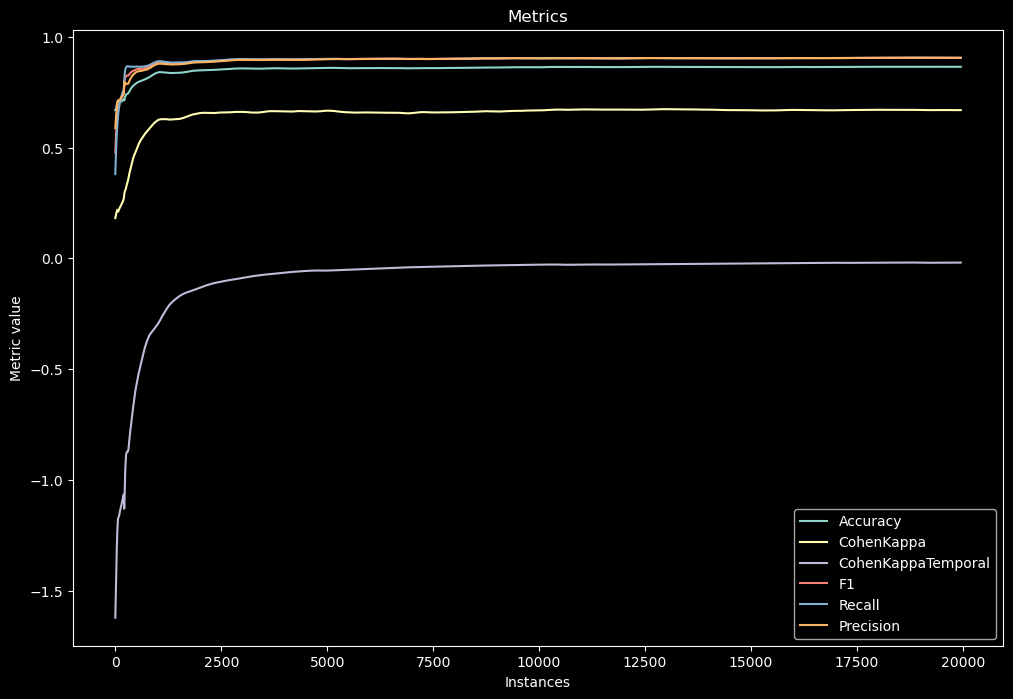

In [98]:
datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])

# crate hoeffding tree classifier model using temporally augmented classifier as base learner
model = TemporallyAugmentedClassifier(base_learner=HoeffdingTreeClassifier(), num_old_labels=5)

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[2, :, 0] = metric_results[dataset_size[0] - 1, :-1]

These results were expected, in fact the temporal augmentation works well and contributes to increase the classification accuracy of the model. Also, we can see that since the accuracy and the other metrics remain stable over time, there is no evidence of a concept drift happening in the training

# Streaming Machine Learning models on datasets with concept drift

### Evaluation on the dataset with concept drift in the features definition

Accuracy: 61.26%, CohenKappa: 0.57%, CohenKappaTemporal: -144.94%, F1: 74.89%, Recall: 90.87%, Precision: 63.69%, 1000
Accuracy: 63.18%, CohenKappa: 0.73%, CohenKappaTemporal: -130.72%, F1: 76.91%, Recall: 95.41%, Precision: 64.42%, 2000
Accuracy: 63.92%, CohenKappa: 0.56%, CohenKappaTemporal: -127.79%, F1: 77.65%, Recall: 96.96%, Precision: 64.76%, 3000
Accuracy: 65.69%, CohenKappa: 0.66%, CohenKappaTemporal: -117.78%, F1: 79.06%, Recall: 97.77%, Precision: 66.36%, 4000
Accuracy: 65.19%, CohenKappa: 0.46%, CohenKappaTemporal: -113.76%, F1: 78.74%, Recall: 98.20%, Precision: 65.71%, 5000
Accuracy: 65.38%, CohenKappa: 0.39%, CohenKappaTemporal: -113.68%, F1: 78.91%, Recall: 98.50%, Precision: 65.81%, 6000
Accuracy: 65.10%, CohenKappa: 0.31%, CohenKappaTemporal: -114.11%, F1: 78.72%, Recall: 98.71%, Precision: 65.46%, 7000
Accuracy: 65.23%, CohenKappa: 0.28%, CohenKappaTemporal: -113.92%, F1: 78.84%, Recall: 98.87%, Precision: 65.56%, 8000
Accuracy: 64.80%, CohenKappa: 0.22%, CohenKappaT

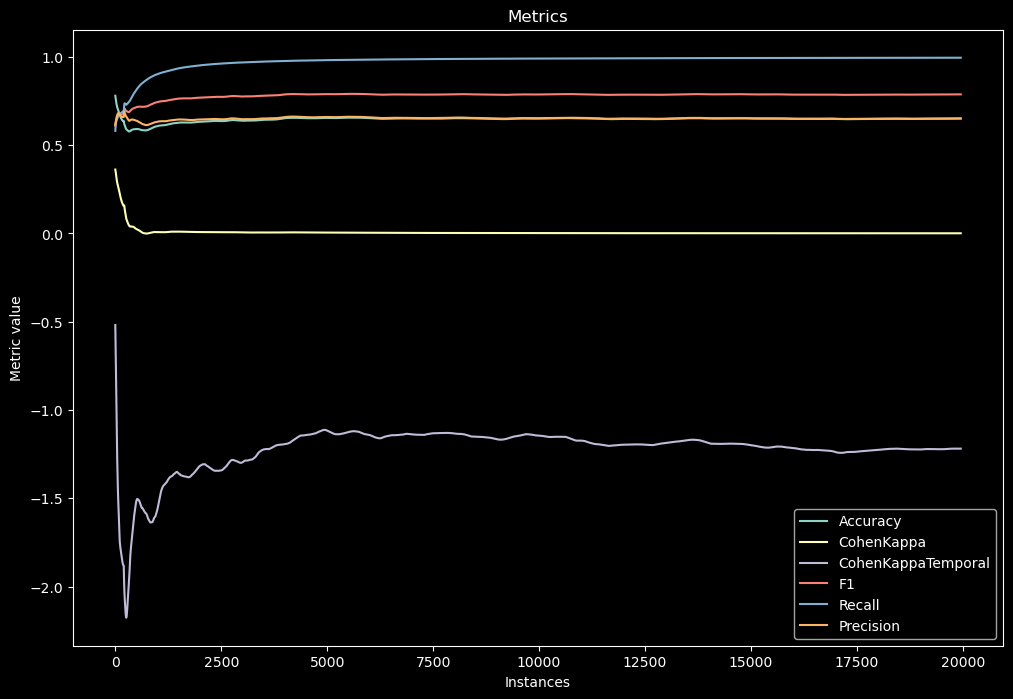

In [99]:
model = naive_bayes.GaussianNB()

datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[0, :, 1] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 63.06%, CohenKappa: 1.06%, CohenKappaTemporal: -133.54%, F1: 76.95%, Recall: 97.01%, Precision: 63.77%, 1000
Accuracy: 64.03%, CohenKappa: 0.61%, CohenKappaTemporal: -125.39%, F1: 77.88%, Recall: 98.52%, Precision: 64.39%, 2000
Accuracy: 64.49%, CohenKappa: 0.44%, CohenKappaTemporal: -124.21%, F1: 78.29%, Recall: 99.02%, Precision: 64.73%, 3000
Accuracy: 65.92%, CohenKappa: 1.06%, CohenKappaTemporal: -116.35%, F1: 79.23%, Recall: 98.15%, Precision: 66.43%, 4000
Accuracy: 65.33%, CohenKappa: 0.70%, CohenKappaTemporal: -112.90%, F1: 78.85%, Recall: 98.45%, Precision: 65.76%, 5000
Accuracy: 65.49%, CohenKappa: 0.60%, CohenKappaTemporal: -112.96%, F1: 79.00%, Recall: 98.71%, Precision: 65.85%, 6000
Accuracy: 65.20%, CohenKappa: 0.48%, CohenKappaTemporal: -113.50%, F1: 78.80%, Recall: 98.89%, Precision: 65.49%, 7000
Accuracy: 65.30%, CohenKappa: 0.38%, CohenKappaTemporal: -113.54%, F1: 78.89%, Recall: 98.99%, Precision: 65.58%, 8000
Accuracy: 64.85%, CohenKappa: 0.31%, CohenKappaT

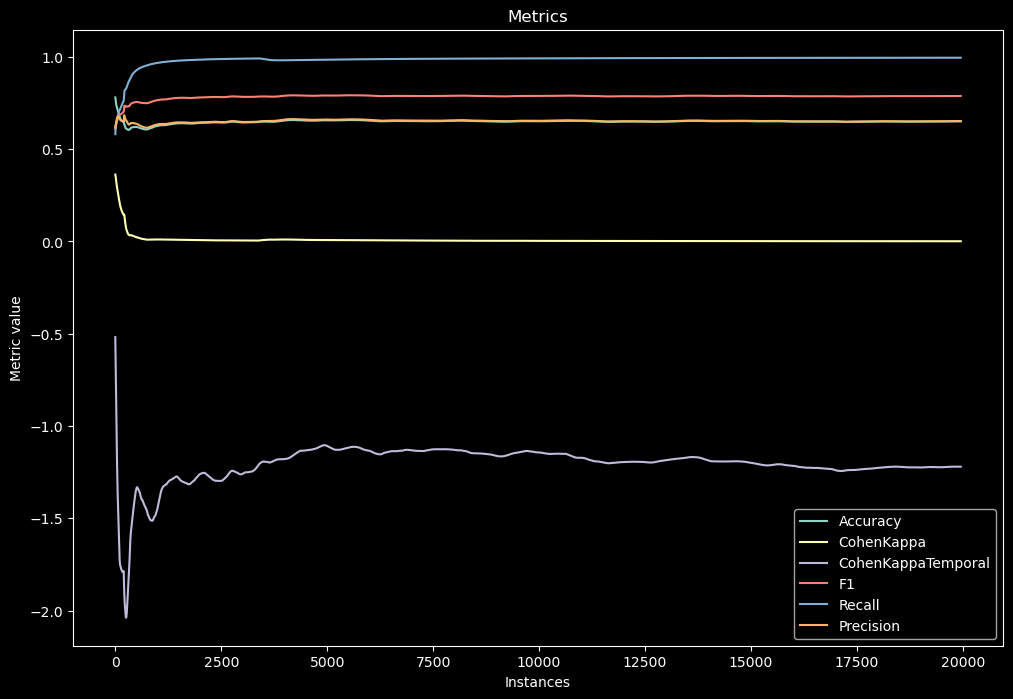

In [100]:

datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[1, :, 1] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 62.36%, CohenKappa: 1.12%, CohenKappaTemporal: -137.97%, F1: 76.11%, Recall: 94.33%, Precision: 63.79%, 1000
Accuracy: 63.68%, CohenKappa: 0.70%, CohenKappaTemporal: -127.59%, F1: 77.48%, Recall: 97.20%, Precision: 64.41%, 2000
Accuracy: 64.05%, CohenKappa: 0.29%, CohenKappaTemporal: -126.95%, F1: 77.85%, Recall: 97.68%, Precision: 64.71%, 3000
Accuracy: 65.72%, CohenKappa: 0.24%, CohenKappaTemporal: -117.62%, F1: 79.14%, Recall: 98.19%, Precision: 66.28%, 4000
Accuracy: 65.21%, CohenKappa: 0.14%, CohenKappaTemporal: -113.64%, F1: 78.81%, Recall: 98.54%, Precision: 65.66%, 5000
Accuracy: 65.39%, CohenKappa: 0.13%, CohenKappaTemporal: -113.58%, F1: 78.96%, Recall: 98.78%, Precision: 65.77%, 6000
Accuracy: 65.08%, CohenKappa: 0.03%, CohenKappaTemporal: -114.20%, F1: 78.75%, Recall: 98.91%, Precision: 65.41%, 7000
Accuracy: 65.22%, CohenKappa: 0.03%, CohenKappaTemporal: -114.00%, F1: 78.86%, Recall: 99.05%, Precision: 65.51%, 8000
Accuracy: 64.73%, CohenKappa: -0.01%, CohenKappa

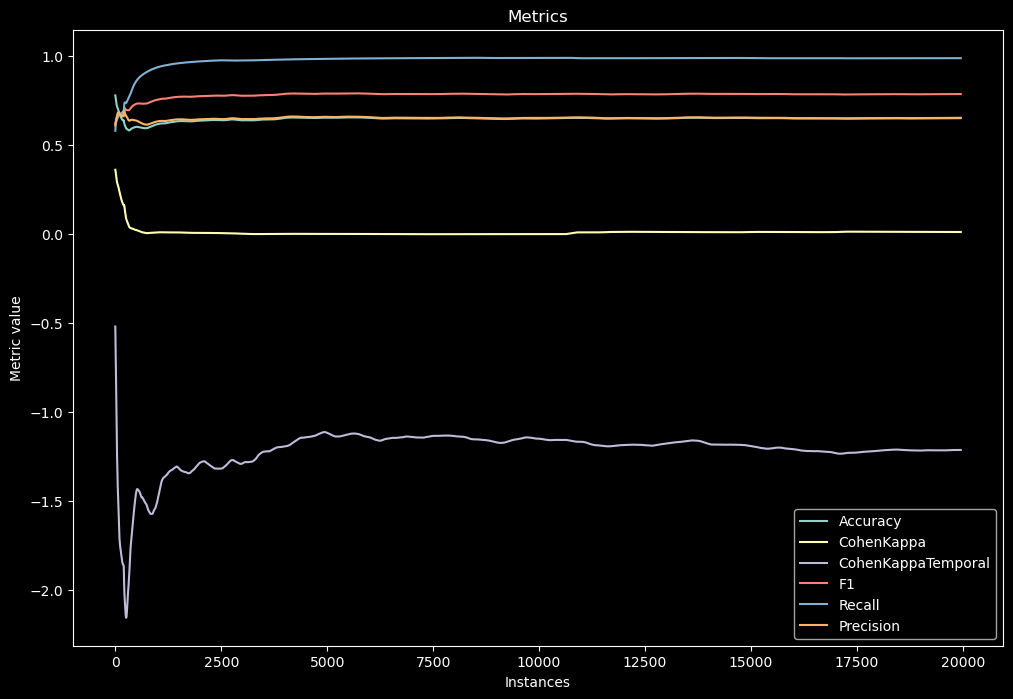

In [101]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = HoeffdingAdaptiveTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[2, :, 1] = metric_results[dataset_size[0] - 1, :-1]


Accuracy: 83.48%, CohenKappa: 64.24%, CohenKappaTemporal: -4.43%, F1: 87.06%, Recall: 87.40%, Precision: 86.72%, 1000
Accuracy: 83.69%, CohenKappa: 64.42%, CohenKappaTemporal: -2.19%, F1: 87.34%, Recall: 87.55%, Precision: 87.14%, 2000
Accuracy: 83.93%, CohenKappa: 64.79%, CohenKappaTemporal: -1.47%, F1: 87.59%, Recall: 87.73%, Precision: 87.46%, 3000
Accuracy: 84.00%, CohenKappa: 64.20%, CohenKappaTemporal: -1.59%, F1: 87.92%, Recall: 87.96%, Precision: 87.89%, 4000
Accuracy: 83.48%, CohenKappa: 63.37%, CohenKappaTemporal: -1.47%, F1: 87.41%, Recall: 87.41%, Precision: 87.41%, 5000
Accuracy: 83.60%, CohenKappa: 63.58%, CohenKappaTemporal: -1.23%, F1: 87.53%, Recall: 87.53%, Precision: 87.53%, 6000
Accuracy: 83.51%, CohenKappa: 63.56%, CohenKappaTemporal: -1.14%, F1: 87.40%, Recall: 87.42%, Precision: 87.38%, 7000
Accuracy: 83.57%, CohenKappa: 63.64%, CohenKappaTemporal: -1.08%, F1: 87.46%, Recall: 87.48%, Precision: 87.45%, 8000
Accuracy: 83.60%, CohenKappa: 63.92%, CohenKappaTemporal

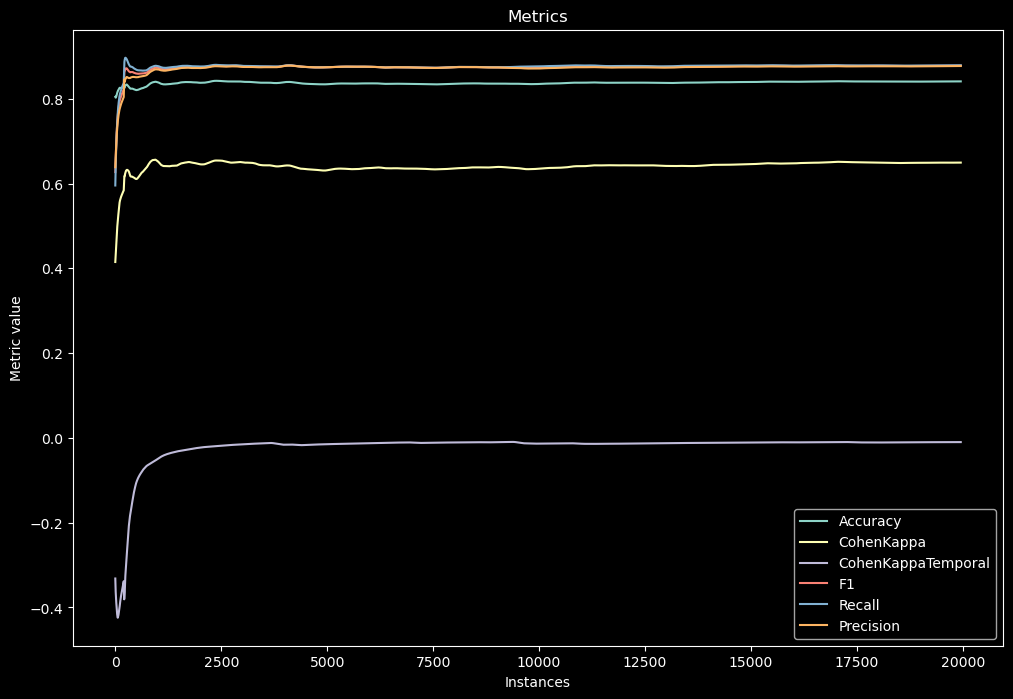

In [102]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5)
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[3, :, 1] = metric_results[dataset_size[0] - 1, :-1]

**Explanation of the apparent absence of concept drift:**

From this dataset and the models used, it appears that the models work relatively well, also with the use of the temporal augmentation. Although it doesn't seem that there is evidence of any concept drift happening during the model training. This result was at first not expected, since the dataset is created with the concept drift in the creation of the various features. But here the models seem to perform well regardless of the concept drift.

The explanation is that such behavior is due to the models trying to predict the current label using information that includes the current feature values and the past labels. But the data that the online models see do not include also the past features values. Since the features values depend only on their past values (and the past values of the other features), the models develop a non-linear approximation of the binary labeling function using the current data available. The current data doesn't include instead the data that would demonstrate a change in the distribution of the feature values. This implies that the models can't develop a non-linear combination of all useful data, therefore they cannot see this type of concept drift happening.

If the streaming machine learning models were to see also the past feature values, then they would develop a non linear combination of all useful data. Therefore, if a concept drift would happen in this scenario, they would be able to see it, since the current data depends also on the past data, which shows a time dependency. 

This phenomenon explains why the streaming machine learning models can predict well the data without suffering from concept drift, at the cost of reduced accuracy. In fact, if all data were provided to the streaming ML models, the accuracy would increase drastically. But it would decrease over time, as a concept drift may happen.

## Evaluation on the dataset with concept drift in the labeling function

Comparison with naive bayes model

Accuracy: 73.27%, CohenKappa: 3.20%, CohenKappaTemporal: -113.60%, F1: 84.40%, Recall: 98.50%, Precision: 73.82%, 1000
Accuracy: 75.59%, CohenKappa: 1.96%, CohenKappaTemporal: -92.13%, F1: 86.02%, Recall: 99.27%, Precision: 75.88%, 2000
Accuracy: 76.83%, CohenKappa: 1.46%, CohenKappaTemporal: -87.84%, F1: 86.84%, Recall: 99.52%, Precision: 77.03%, 3000
Accuracy: 76.89%, CohenKappa: 1.10%, CohenKappaTemporal: -92.50%, F1: 86.90%, Recall: 99.64%, Precision: 77.05%, 4000
Accuracy: 75.74%, CohenKappa: 0.80%, CohenKappaTemporal: -101.83%, F1: 86.16%, Recall: 99.71%, Precision: 75.85%, 5000
Accuracy: 76.00%, CohenKappa: 0.68%, CohenKappaTemporal: -96.45%, F1: 86.34%, Recall: 99.76%, Precision: 76.10%, 6000
Accuracy: 75.61%, CohenKappa: 0.57%, CohenKappaTemporal: -101.53%, F1: 86.09%, Recall: 99.79%, Precision: 75.70%, 7000
Accuracy: 75.23%, CohenKappa: 0.48%, CohenKappaTemporal: -105.28%, F1: 85.85%, Recall: 99.82%, Precision: 75.31%, 8000
Accuracy: 74.55%, CohenKappa: 0.41%, CohenKappaTempo

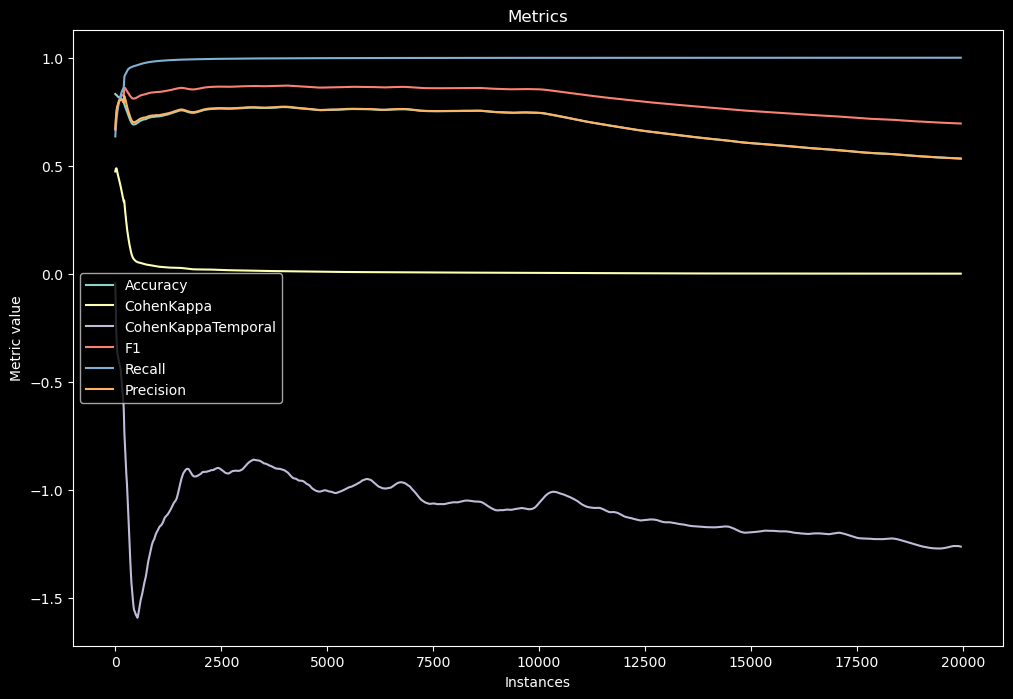

In [103]:
model = naive_bayes.GaussianNB()

datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[0, :, 2] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 73.27%, CohenKappa: 3.20%, CohenKappaTemporal: -113.60%, F1: 84.40%, Recall: 98.50%, Precision: 73.82%, 1000
Accuracy: 75.59%, CohenKappa: 1.96%, CohenKappaTemporal: -92.13%, F1: 86.02%, Recall: 99.27%, Precision: 75.88%, 2000
Accuracy: 76.83%, CohenKappa: 1.46%, CohenKappaTemporal: -87.84%, F1: 86.84%, Recall: 99.52%, Precision: 77.03%, 3000
Accuracy: 76.77%, CohenKappa: 1.08%, CohenKappaTemporal: -93.54%, F1: 86.81%, Recall: 99.41%, Precision: 77.05%, 4000
Accuracy: 75.64%, CohenKappa: 1.02%, CohenKappaTemporal: -102.66%, F1: 86.08%, Recall: 99.45%, Precision: 75.88%, 5000
Accuracy: 75.90%, CohenKappa: 0.84%, CohenKappaTemporal: -97.27%, F1: 86.26%, Recall: 99.52%, Precision: 76.12%, 6000
Accuracy: 75.53%, CohenKappa: 0.69%, CohenKappaTemporal: -102.24%, F1: 86.02%, Recall: 99.58%, Precision: 75.71%, 7000
Accuracy: 75.13%, CohenKappa: 0.74%, CohenKappaTemporal: -106.11%, F1: 85.76%, Recall: 99.53%, Precision: 75.34%, 8000
Accuracy: 74.43%, CohenKappa: 0.63%, CohenKappaTempo

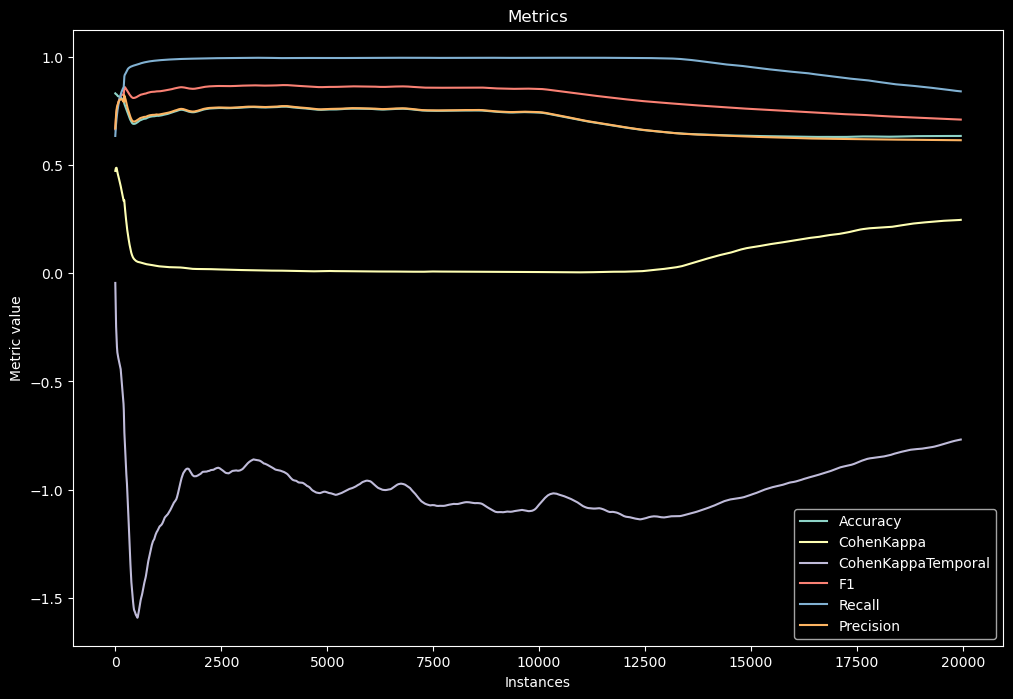

In [104]:

datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[1, :, 2] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 73.27%, CohenKappa: 3.85%, CohenKappaTemporal: -113.60%, F1: 84.36%, Recall: 98.23%, Precision: 73.92%, 1000
Accuracy: 75.59%, CohenKappa: 2.36%, CohenKappaTemporal: -92.13%, F1: 86.00%, Recall: 99.14%, Precision: 75.94%, 2000
Accuracy: 76.73%, CohenKappa: 1.56%, CohenKappaTemporal: -88.65%, F1: 86.77%, Recall: 99.31%, Precision: 77.04%, 3000
Accuracy: 76.67%, CohenKappa: 1.33%, CohenKappaTemporal: -94.38%, F1: 86.73%, Recall: 99.15%, Precision: 77.08%, 4000
Accuracy: 75.56%, CohenKappa: 0.94%, CohenKappaTemporal: -103.33%, F1: 86.02%, Recall: 99.31%, Precision: 75.87%, 5000
Accuracy: 75.80%, CohenKappa: 0.71%, CohenKappaTemporal: -98.09%, F1: 86.19%, Recall: 99.36%, Precision: 76.10%, 6000
Accuracy: 75.43%, CohenKappa: 0.55%, CohenKappaTemporal: -103.07%, F1: 85.95%, Recall: 99.43%, Precision: 75.69%, 7000
Accuracy: 75.06%, CohenKappa: 0.44%, CohenKappaTemporal: -106.74%, F1: 85.72%, Recall: 99.48%, Precision: 75.30%, 8000
Accuracy: 74.40%, CohenKappa: 0.35%, CohenKappaTempo

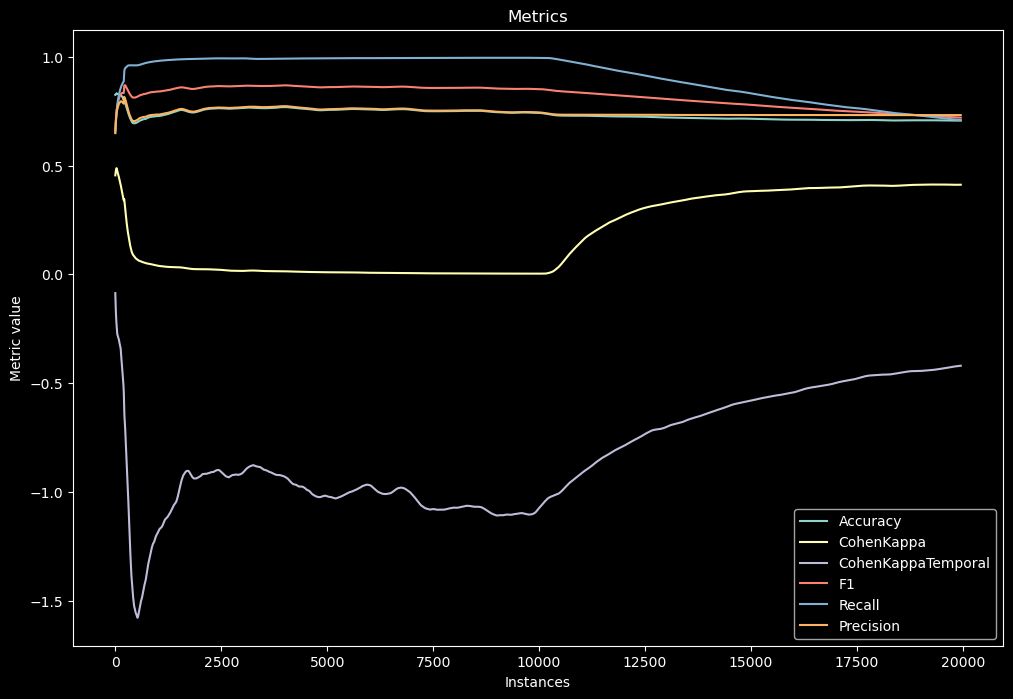

In [105]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = HoeffdingAdaptiveTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[2, :, 2] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 85.99%, CohenKappa: 64.64%, CohenKappaTemporal: -12.00%, F1: 90.37%, Recall: 89.63%, Precision: 91.12%, 1000
Accuracy: 86.54%, CohenKappa: 63.81%, CohenKappaTemporal: -5.91%, F1: 91.07%, Recall: 90.67%, Precision: 91.46%, 2000
Accuracy: 87.16%, CohenKappa: 64.15%, CohenKappaTemporal: -4.05%, F1: 91.62%, Recall: 91.37%, Precision: 91.88%, 3000
Accuracy: 87.50%, CohenKappa: 65.03%, CohenKappaTemporal: -4.17%, F1: 91.85%, Recall: 91.58%, Precision: 92.12%, 4000
Accuracy: 87.58%, CohenKappa: 66.34%, CohenKappaTemporal: -3.33%, F1: 91.78%, Recall: 91.58%, Precision: 91.99%, 5000
Accuracy: 87.45%, CohenKappa: 65.72%, CohenKappaTemporal: -2.73%, F1: 91.73%, Recall: 91.56%, Precision: 91.90%, 6000
Accuracy: 87.61%, CohenKappa: 66.51%, CohenKappaTemporal: -2.36%, F1: 91.80%, Recall: 91.65%, Precision: 91.94%, 7000
Accuracy: 87.66%, CohenKappa: 67.01%, CohenKappaTemporal: -2.28%, F1: 91.79%, Recall: 91.61%, Precision: 91.96%, 8000
Accuracy: 87.68%, CohenKappa: 67.62%, CohenKappaTempora

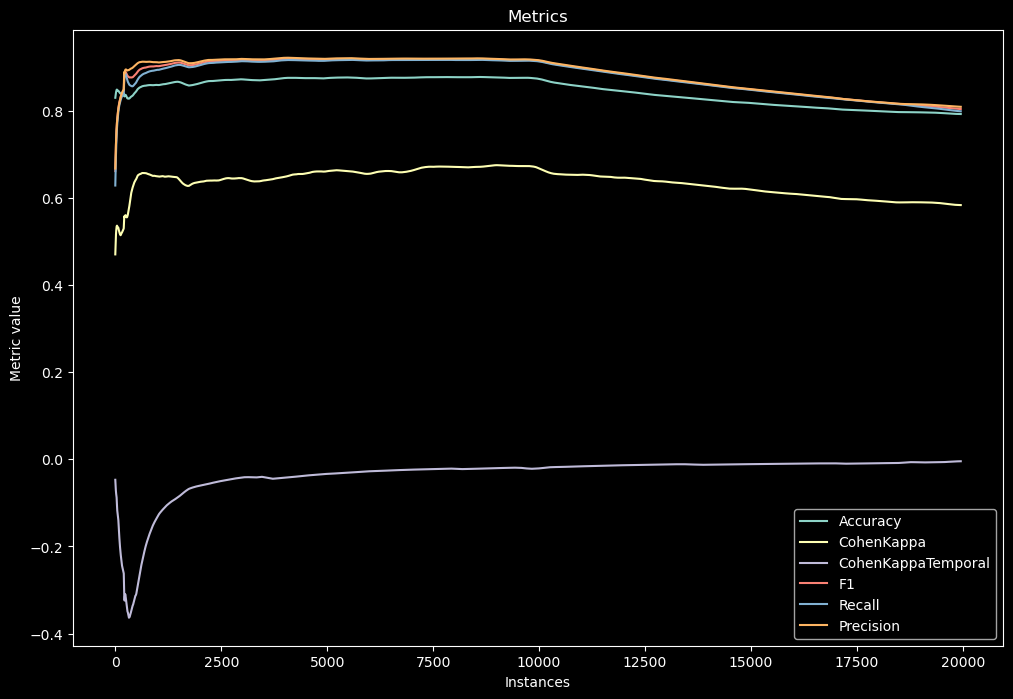

In [106]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5)

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[3, :, 2] = metric_results[dataset_size[0] - 1, :-1]

Here these plots show the expected results. There is clear evidence of concept drift, due to the dip in the classification accuracy and the other metrics employed. Also the temporal augmentation works very well in this case, showing a clear increase in the accuracy. Moreover, the models using the adaptive algorithm, such as ADWIN concept drift detector, perform better at handling the concept drift, and are able to maintain relatively high accuracy.

## Streaming Machine Learning Ensemble models on both datasets with concept drift


Evaluation of the datasets with ensemble models, showing a clear increase of the classification accuracy compared to their relative single models. This increase in accuracy is paid with an increase of computational resources required to classify the data

In [107]:
#import hoeffding adaptive tree classifier and streaming random patches classifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier
# import adwin from river
from river.drift import ADWIN

Now evaluate the dataset with drift in the features composition

Accuracy: 62.46%, CohenKappa: 2.57%, CohenKappaTemporal: -137.34%, F1: 75.92%, Recall: 93.07%, Precision: 64.10%, 1000
Accuracy: 63.68%, CohenKappa: 2.83%, CohenKappaTemporal: -127.59%, F1: 77.08%, Recall: 95.02%, Precision: 64.84%, 2000
Accuracy: 63.95%, CohenKappa: 2.47%, CohenKappaTemporal: -127.58%, F1: 77.35%, Recall: 95.20%, Precision: 65.14%, 3000
Accuracy: 65.74%, CohenKappa: 2.87%, CohenKappaTemporal: -117.46%, F1: 78.80%, Recall: 96.11%, Precision: 66.77%, 4000
Accuracy: 65.31%, CohenKappa: 2.61%, CohenKappaTemporal: -113.02%, F1: 78.54%, Recall: 96.71%, Precision: 66.12%, 5000
Accuracy: 65.31%, CohenKappa: 2.07%, CohenKappaTemporal: -114.09%, F1: 78.59%, Recall: 96.86%, Precision: 66.12%, 6000
Accuracy: 64.92%, CohenKappa: 1.72%, CohenKappaTemporal: -115.16%, F1: 78.33%, Recall: 96.90%, Precision: 65.73%, 7000
Accuracy: 65.11%, CohenKappa: 1.95%, CohenKappaTemporal: -114.69%, F1: 78.46%, Recall: 97.00%, Precision: 65.87%, 8000
Accuracy: 64.78%, CohenKappa: 2.45%, CohenKappaT

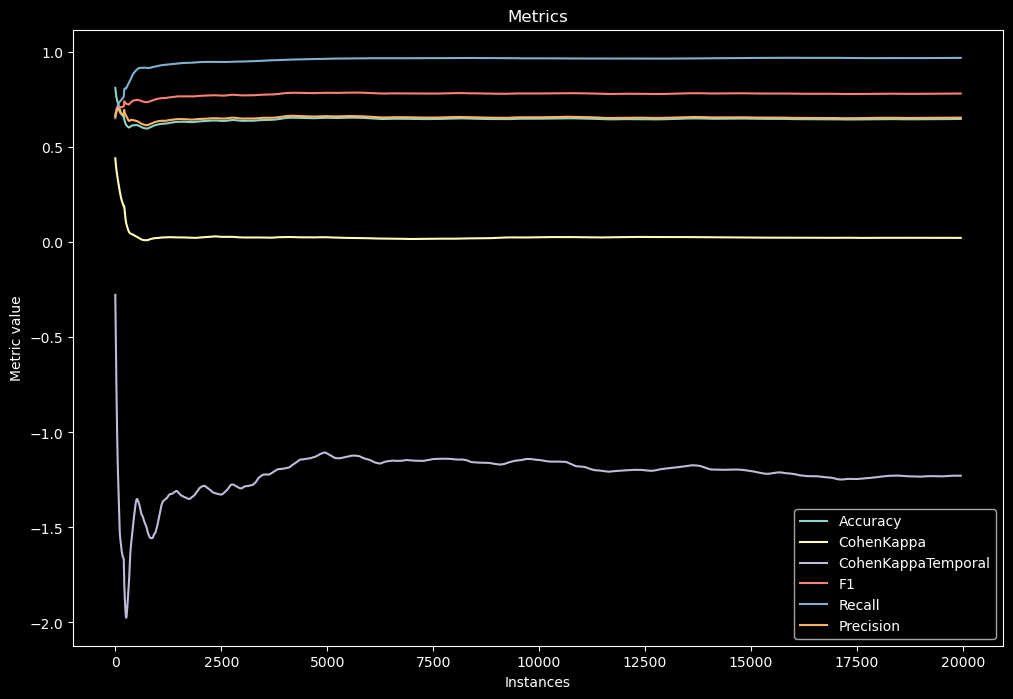

In [108]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
# create streaming random patches classifier model
model = SRPClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN(), model=HoeffdingTreeClassifier())

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[4, :, 1] = metric_results[dataset_size[0] - 1, :-1]

Accuracy: 61.76%, CohenKappa: 2.87%, CohenKappaTemporal: -141.77%, F1: 74.97%, Recall: 90.08%, Precision: 64.20%, 1000
Accuracy: 62.78%, CohenKappa: 2.65%, CohenKappaTemporal: -133.23%, F1: 76.06%, Recall: 91.98%, Precision: 64.84%, 2000
Accuracy: 62.82%, CohenKappa: 1.54%, CohenKappaTemporal: -134.74%, F1: 76.23%, Recall: 92.21%, Precision: 64.97%, 3000
Accuracy: 64.52%, CohenKappa: 1.99%, CohenKappaTemporal: -125.24%, F1: 77.64%, Recall: 93.02%, Precision: 66.63%, 4000
Accuracy: 64.01%, CohenKappa: 1.67%, CohenKappaTemporal: -121.01%, F1: 77.29%, Recall: 93.33%, Precision: 65.96%, 5000
Accuracy: 64.54%, CohenKappa: 2.81%, CohenKappaTemporal: -118.83%, F1: 77.66%, Recall: 93.71%, Precision: 66.30%, 6000
Accuracy: 64.28%, CohenKappa: 2.88%, CohenKappaTemporal: -119.11%, F1: 77.44%, Recall: 93.71%, Precision: 65.98%, 7000
Accuracy: 64.26%, CohenKappa: 2.86%, CohenKappaTemporal: -119.92%, F1: 77.39%, Recall: 93.38%, Precision: 66.08%, 8000
Accuracy: 63.96%, CohenKappa: 3.08%, CohenKappaT

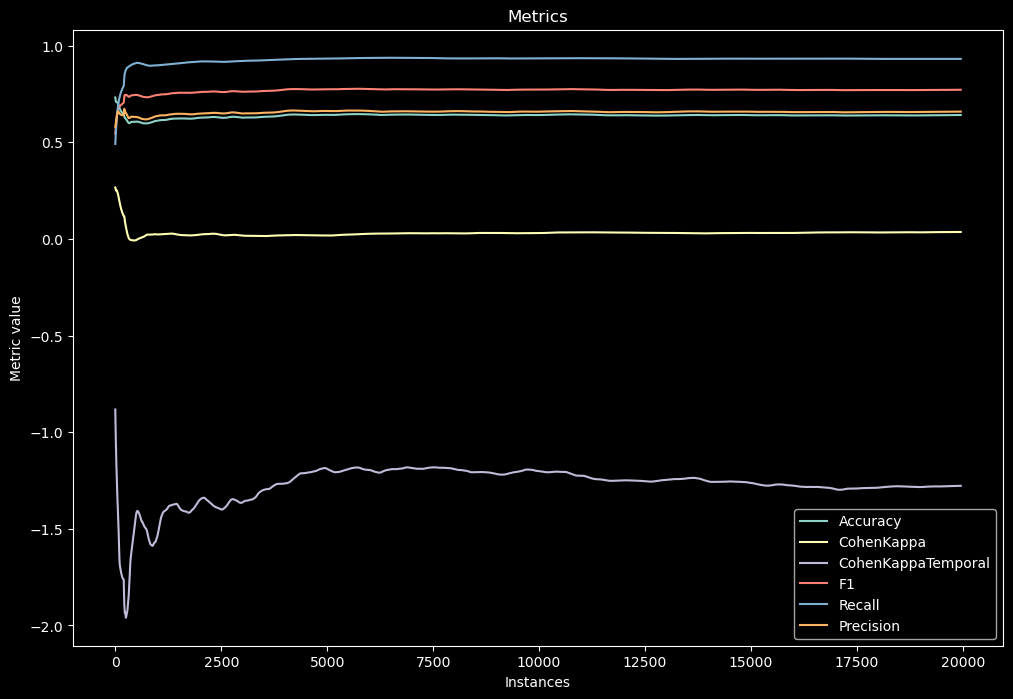

In [109]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
# create adaptive random forest classifier model
model = AdaptiveRandomForestClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN())

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[5, :, 1] = metric_results[dataset_size[0] - 1, :-1]

Now evaluate on the dataset with drift in the labeling function

Accuracy: 73.57%, CohenKappa: 6.04%, CohenKappaTemporal: -111.20%, F1: 84.47%, Recall: 97.95%, Precision: 74.25%, 1000
Accuracy: 75.59%, CohenKappa: 3.55%, CohenKappaTemporal: -92.13%, F1: 85.95%, Recall: 98.74%, Precision: 76.10%, 2000
Accuracy: 76.73%, CohenKappa: 2.88%, CohenKappaTemporal: -88.65%, F1: 86.72%, Recall: 98.92%, Precision: 77.21%, 3000
Accuracy: 76.82%, CohenKappa: 2.19%, CohenKappaTemporal: -93.13%, F1: 86.81%, Recall: 99.19%, Precision: 77.18%, 4000
Accuracy: 75.68%, CohenKappa: 1.59%, CohenKappaTemporal: -102.33%, F1: 86.09%, Recall: 99.34%, Precision: 75.95%, 5000
Accuracy: 75.95%, CohenKappa: 1.36%, CohenKappaTemporal: -96.86%, F1: 86.27%, Recall: 99.45%, Precision: 76.18%, 6000
Accuracy: 75.67%, CohenKappa: 1.74%, CohenKappaTemporal: -101.06%, F1: 86.09%, Recall: 99.53%, Precision: 75.84%, 7000
Accuracy: 75.28%, CohenKappa: 2.46%, CohenKappaTemporal: -104.87%, F1: 85.80%, Recall: 99.25%, Precision: 75.56%, 8000
Accuracy: 74.59%, CohenKappa: 2.15%, CohenKappaTempo

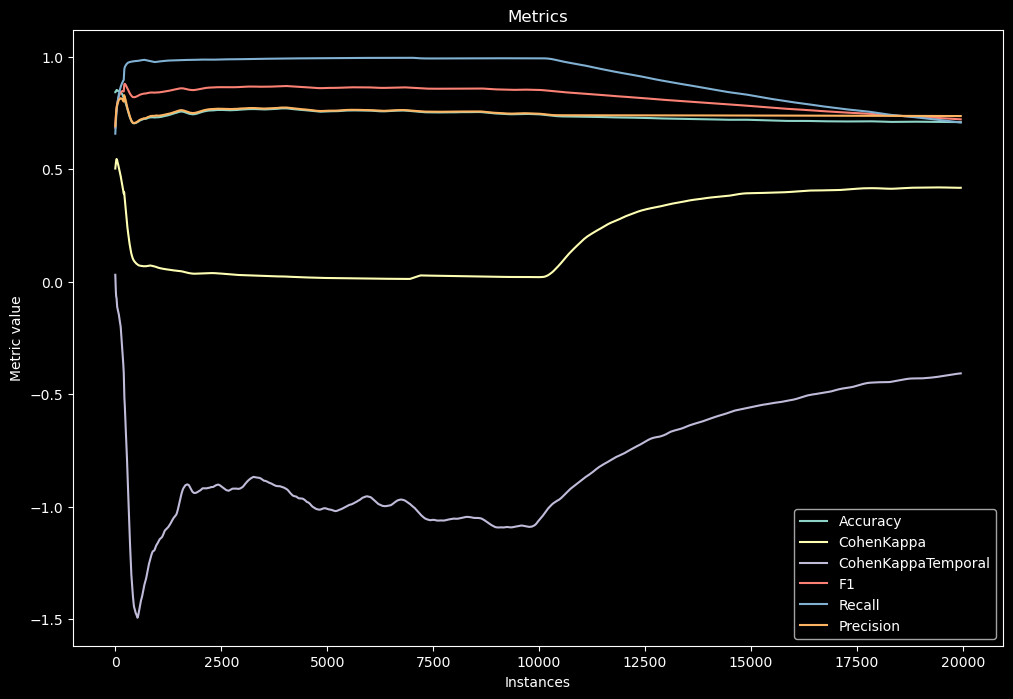

In [110]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])

# create streaming random patches classifier model
model = SRPClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN(), model=HoeffdingTreeClassifier())

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[4, :, 2] = metric_results[dataset_size[0] - 1, :-1]


Accuracy: 72.17%, CohenKappa: 9.49%, CohenKappaTemporal: -122.40%, F1: 83.09%, Recall: 93.18%, Precision: 74.97%, 1000
Accuracy: 74.94%, CohenKappa: 6.39%, CohenKappaTemporal: -97.24%, F1: 85.34%, Recall: 96.43%, Precision: 76.54%, 2000
Accuracy: 76.33%, CohenKappa: 4.77%, CohenKappaTemporal: -91.89%, F1: 86.37%, Recall: 97.57%, Precision: 77.47%, 3000
Accuracy: 76.47%, CohenKappa: 3.77%, CohenKappaTemporal: -96.04%, F1: 86.51%, Recall: 98.05%, Precision: 77.39%, 4000
Accuracy: 75.40%, CohenKappa: 3.28%, CohenKappaTemporal: -104.66%, F1: 85.81%, Recall: 98.23%, Precision: 76.18%, 5000
Accuracy: 75.68%, CohenKappa: 2.83%, CohenKappaTemporal: -99.05%, F1: 86.02%, Recall: 98.46%, Precision: 76.37%, 6000
Accuracy: 75.24%, CohenKappa: 2.21%, CohenKappaTemporal: -104.60%, F1: 85.75%, Recall: 98.53%, Precision: 75.91%, 7000
Accuracy: 74.85%, CohenKappa: 2.03%, CohenKappaTemporal: -108.50%, F1: 85.50%, Recall: 98.52%, Precision: 75.51%, 8000
Accuracy: 74.12%, CohenKappa: 1.79%, CohenKappaTempo

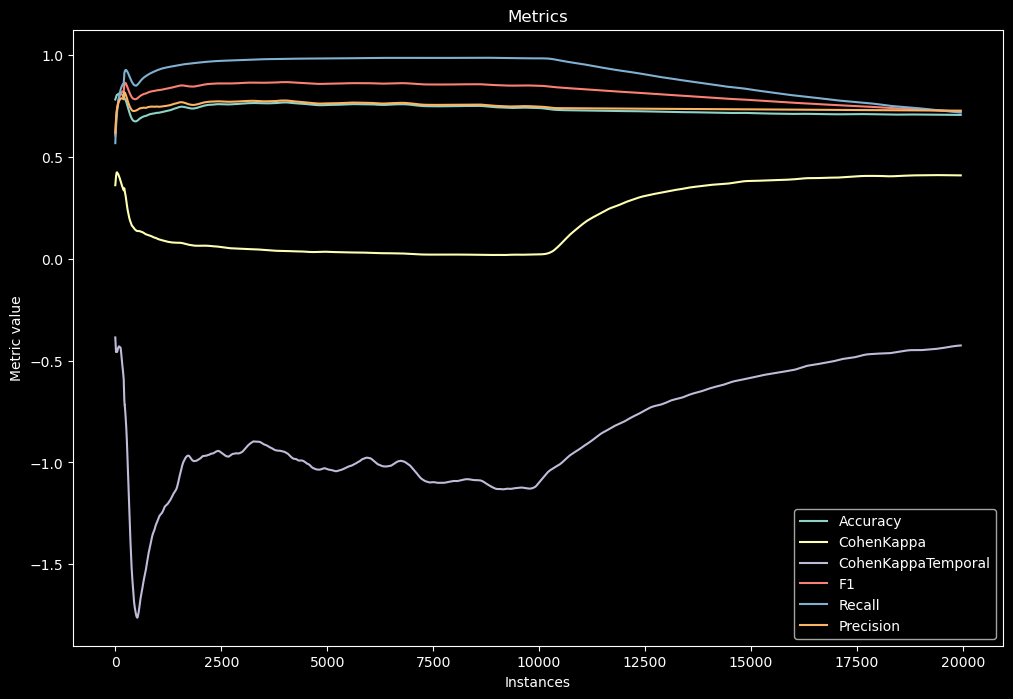

In [111]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])

# create adaptive random forest classifier model
model = AdaptiveRandomForestClassifier(n_models=7, drift_detector=ADWIN(), warning_detector=ADWIN())

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

# save final results to numpy array
scores[5, :, 2] = metric_results[dataset_size[0] - 1, :-1]

## Visualization of the performance of the models for the different datasets

In [112]:
# visualize table of scores where the columns are the metrics names and the rows are the models used for training
scores = np.around(scores, decimals=3)

index = ['Naive Bayes', 'Hoeffding Tree', 'Hoeffding Adaptive Tree', 'Temporally Augmented Hoeffding Adaptive Tree', 'Streaming Random Patches with ADWIN', 'Adaptive Random Forest with ADWIN']

columns = ["Accuracy", "CohenKappa", "CohenKappaTemporal", "F1Score", "Precision", "Recall"]


Showing the results for the dataset with the drift in the features

In [113]:

# display table from numpy array scores
df1 = pd.DataFrame(scores[:, :, 1], index=index, columns=columns)
# add nice background colors for the table headings and rows names to the df
df1.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with features drift")



,Accuracy,CohenKappa,CohenKappaTemporal,F1Score,Precision,Recall
Naive Bayes,0.651,0.001,-1.219,0.788,0.995,0.652
Hoeffding Tree,0.650,0.001,-1.220,0.788,0.995,0.652
Hoeffding Adaptive Tree,0.652,0.013,-1.212,0.787,0.989,0.654
Temporally Augmented Hoeffding Adaptive Tree,0.841,0.649,-0.010,0.878,0.879,0.877
Streaming Random Patches with ADWIN,0.649,0.023,-1.228,0.783,0.970,0.656
Adaptive Random Forest with ADWIN,0.641,0.036,-1.278,0.772,0.932,0.659


Showing the results for the dataset with the drift in the labeling function

In [114]:
# display table from numpy array scores
df2 = pd.DataFrame(scores[:, :, 2], index=index, columns=columns)
# add nice background colors for the table headings and rows names to the df
df2.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with labeling drift")



,Accuracy,CohenKappa,CohenKappaTemporal,F1Score,Precision,Recall
Naive Bayes,0.532,-0.000,-1.263,0.695,0.999,0.532
Hoeffding Tree,0.635,0.247,-0.768,0.710,0.840,0.615
Hoeffding Adaptive Tree,0.707,0.412,-0.420,0.720,0.709,0.732
Temporally Augmented Hoeffding Adaptive Tree,0.792,0.583,-0.005,0.804,0.799,0.809
Streaming Random Patches with ADWIN,0.709,0.417,-0.408,0.721,0.707,0.736
Adaptive Random Forest with ADWIN,0.705,0.409,-0.426,0.722,0.717,0.726


Showing the final metric values for the dataset with no concept drift added

In [115]:
# display table from numpy array scores
df0 = pd.DataFrame(scores[:-3, :, 0], index=index[:-3], columns=columns)
# add nice background colors for the table headings and rows names to the df
df0.style \
    .set_table_styles([dict(selector="th", props=[('background-color', 'darkorange')])]) \
	.format("{:.3f}") \
    .set_caption("Prequential Evaluation Results of dataset with no drift")



,Accuracy,CohenKappa,CohenKappaTemporal,F1Score,Precision,Recall
Naive Bayes,0.713,0.002,-1.164,0.832,0.999,0.713
Hoeffding Tree,0.712,-0.000,-1.168,0.832,0.998,0.713
Hoeffding Adaptive Tree,0.865,0.669,-0.019,0.905,0.905,0.905
